Through a real-world challenge, this hackathon aims to enhance competitors' data science and innovative analytical thinking abilities. Get an opportunity to work on a remarkable data science technology by competing with the best brains in this area at this point in time, where artificial intelligence and machine learning are at the forefront of attention, and find out how you stack up!

This hackathon will try to address the challenges faced by taxi operators in quoting the right fare to customers before starting the trip. However, the details are shared with taxi drivers or operators related to the trip, they find it difficult to quote the right fare because of uncertainties and calculation complexities. The same issue is faced by passengers as well because of inaccurate or irrelevant fares quoted. To find a solution for this, this hackathon provides a historical dataset to participants that includes records of taxi trip details and fares of those trips. Using this dataset, the participants need to build machine learning models for predicting the trip fare based on the given other useful features of the trip.

Overall, it involves using a dataset, finding the best set of features from the dataset, building a machine learning model to predict trip fare based on other trip features and evaluating the predictions using mean squared error and finally submitting the predictions in the given template.

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [1]:
# first we have to read the problem statement and dict.

In [63]:
# Import the libraries.....
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [64]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [65]:
train.shape , test.shape 

((35000, 20), (15000, 19))

In [66]:
combined = pd.concat([train,test])
combined.shape


(50000, 20)

In [67]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   trip_distance            50000 non-null  float64
 1   rate_code                50000 non-null  int64  
 2   store_and_fwd_flag       50000 non-null  object 
 3   payment_type             50000 non-null  int64  
 4   fare_amount              50000 non-null  float64
 5   extra                    50000 non-null  float64
 6   mta_tax                  50000 non-null  float64
 7   tip_amount               50000 non-null  float64
 8   tolls_amount             50000 non-null  float64
 9   imp_surcharge            50000 non-null  float64
 10  total_amount             50000 non-null  float64
 11  pickup_location_id       50000 non-null  int64  
 12  dropoff_location_id      50000 non-null  int64  
 13  year                     50000 non-null  int64  
 14  month                 

In [68]:
combined.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.30
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.40
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,1286.0,30.36
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,2586.0,4.30
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,1575.0,23.80


### Univariate Analysis:

In [69]:
# List of the Numeric Variable 
num = combined.select_dtypes(include = np.number).columns
num

Index(['trip_distance', 'rate_code', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'imp_surcharge',
       'total_amount', 'pickup_location_id', 'dropoff_location_id', 'year',
       'month', 'day', 'day_of_week', 'hour_of_day', 'trip_duration',
       'calculated_total_amount'],
      dtype='object')

In [70]:
num_cols = ['trip_distance','fare_amount','extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'imp_surcharge','total_amount','trip_duration','calculated_total_amount']

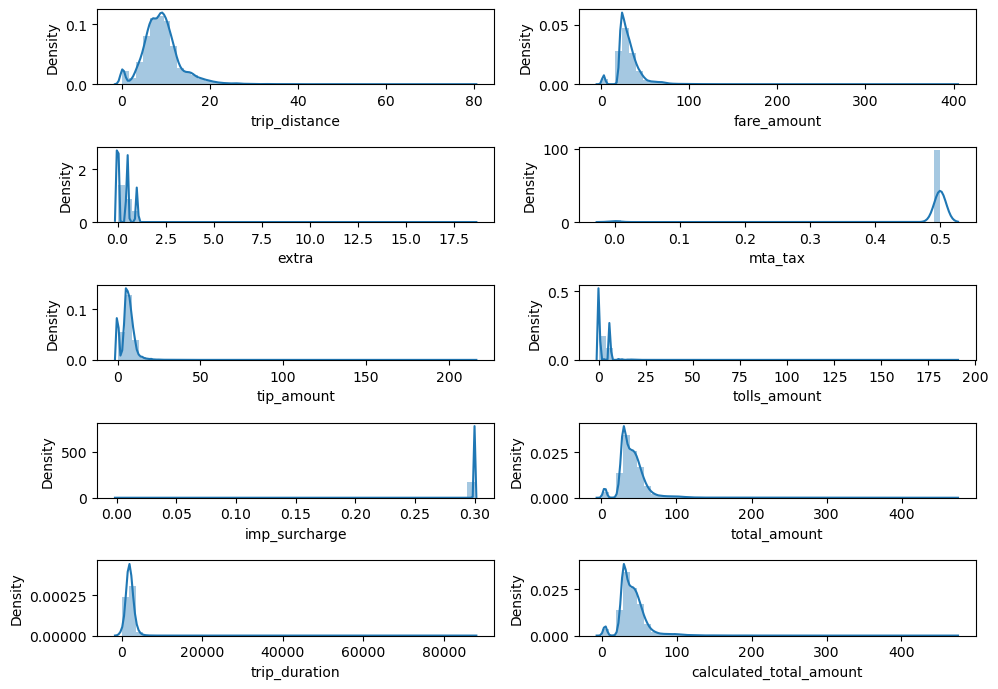

In [71]:
plt.figure(figsize=(10,7))
t= 1 
for i in num_cols:
    plt.subplot(5,2,t)
    sns.distplot(combined[i])
    t+=1
    
plt.tight_layout()
plt.show()

In [72]:
# CategoricL Variables"

cat_cols = ['store_and_fwd_flag','rate_code', 'payment_type',  'pickup_location_id', 'dropoff_location_id', 'year',
       'month', 'day', 'day_of_week', 'hour_of_day']

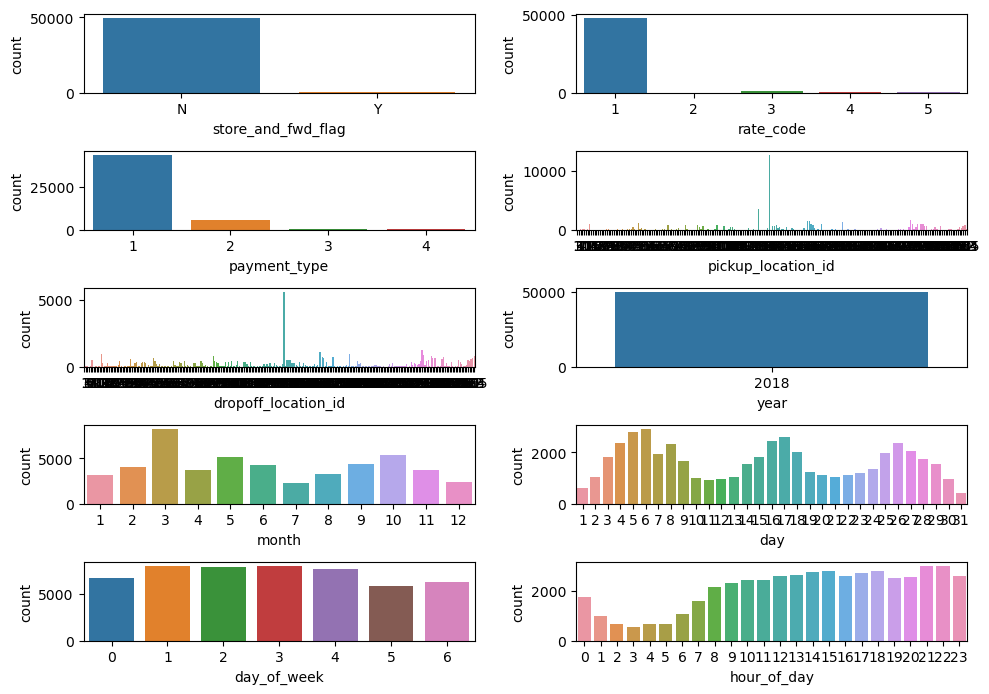

In [73]:
plt.figure(figsize=(10,7))
t= 1 
for i in cat_cols:
    plt.subplot(5,2,t)
    sns.countplot(x = i , data= combined)
    t+=1
    
plt.tight_layout()
plt.show()

# Bivariate Analysis

* Num vs Target : scatterplot 
* Cat vs Target  : boxplot

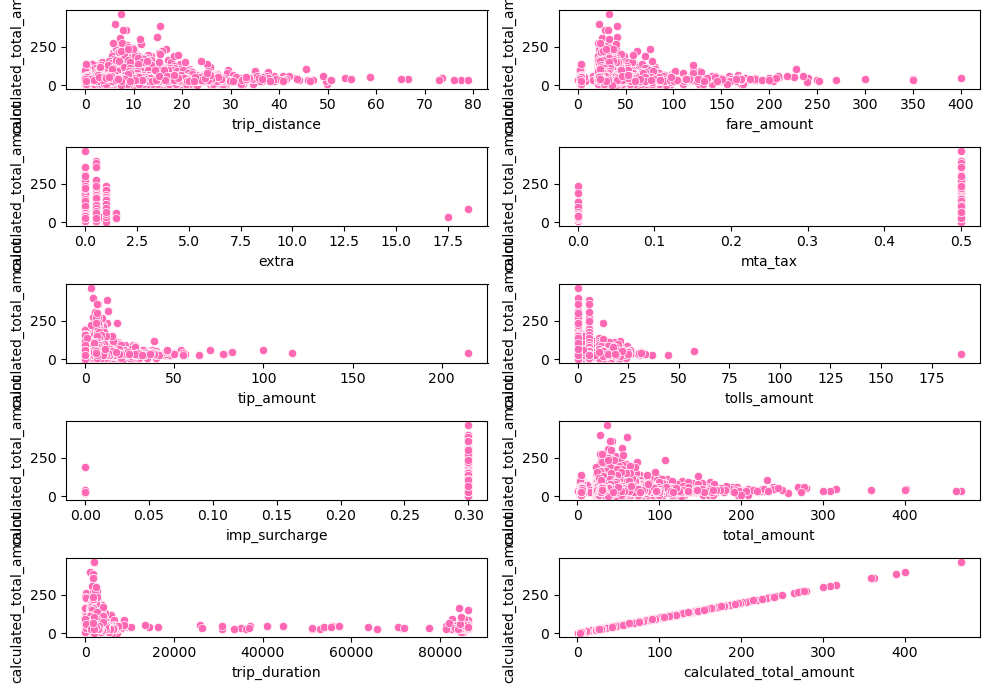

In [74]:
# Numerical Vars....
plt.figure(figsize=(10,7))
t= 1 
for i in num_cols:
    plt.subplot(5,2,t)
    sns.scatterplot(x = combined.loc[:,i], y=combined.calculated_total_amount, color = 'hotpink')
    t+=1
    
plt.tight_layout()
plt.show()

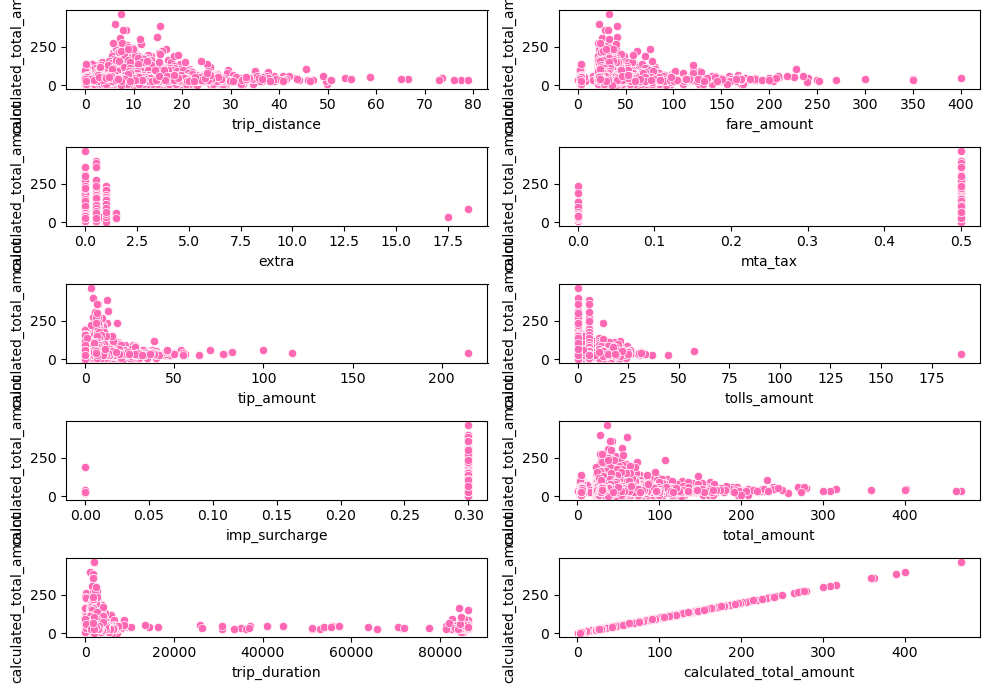

In [75]:
# Numerical Vars....
plt.figure(figsize=(10,7))
t= 1 
for i in num_cols:
    plt.subplot(5,2,t)
    sns.scatterplot(x = combined.loc[:,i], y =combined['calculated_total_amount'],data = combined, color = 'hotpink')
    t+=1
    
plt.tight_layout()
plt.show()

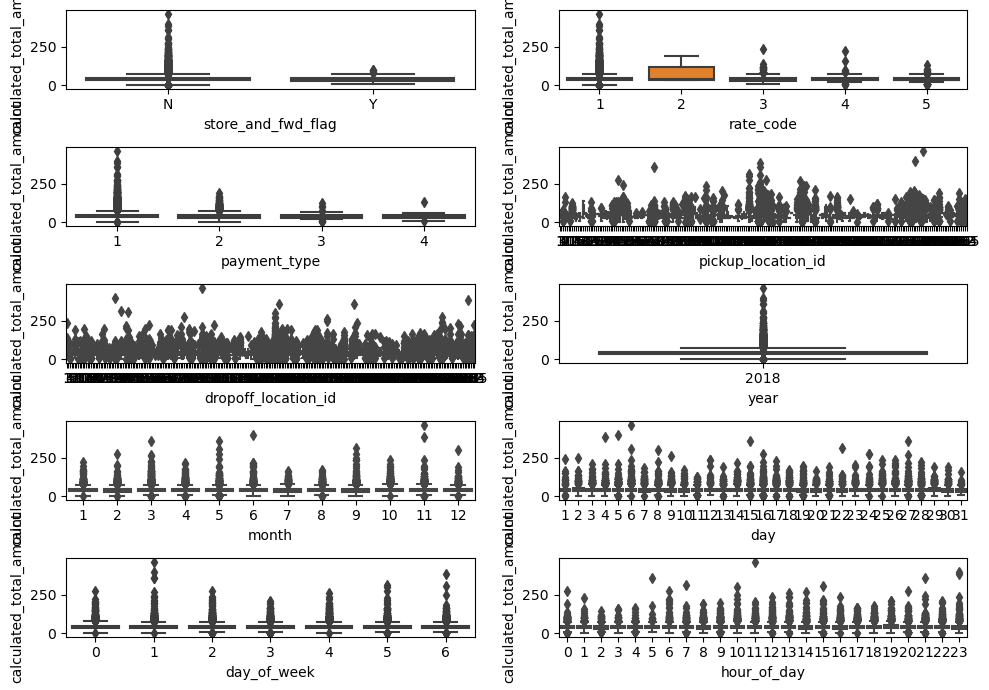

In [76]:
## Categorical vars....
plt.figure(figsize=(10,7))
t= 1 
for i in cat_cols:
    plt.subplot(5,2,t)
    sns.boxplot(x = i ,y =combined['calculated_total_amount'],  data= combined)
    t+=1
    
plt.tight_layout()
plt.show()

In [77]:
# Missing values :
combined.isnull().sum()

trip_distance                  0
rate_code                      0
store_and_fwd_flag             0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
imp_surcharge                  0
total_amount                   0
pickup_location_id             0
dropoff_location_id            0
year                           0
month                          0
day                            0
day_of_week                    0
hour_of_day                    0
trip_duration                  0
calculated_total_amount    15000
dtype: int64

## Feature Engineering:

In [78]:
combined.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.30
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.40
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,1286.0,30.36
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,2586.0,4.30
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,1575.0,23.80


In [79]:
# TRip Duration in Hours
combined['trip_duration'] = combined['trip_duration']/3600

In [80]:
# Pick Up and Drop Location
combined.pickup_location_id.value_counts()[:5].index

Int64Index([138, 132, 230, 161, 162], dtype='int64')

In [81]:
#localdf = pd.DataFrame(combined.pickup_location_id.astype(str) + '_'+ combined.dropoff_location_id.astype(str),columns= ['Loc'])

In [82]:
# localdf.value_counts()[:5].index

In [83]:
combined['pick_&_drop'] = pd.DataFrame(combined.pickup_location_id.astype(str) + '_'+ combined.dropoff_location_id.astype(str),columns= ['Loc'])

In [84]:
#localdf.groupby('Loc')['tgt'].describe()

In [85]:
combined.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount,pick_&_drop
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,0.591944,24.30,262_138
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,0.660278,37.40,263_236
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,0.357222,30.36,138_230
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,0.718333,4.30,186_138
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,0.437500,23.80,162_87


In [86]:
combined['magic1'] = combined.groupby('pick_&_drop')['calculated_total_amount'].transform('count')
combined['magic2'] = combined.groupby('pick_&_drop')['calculated_total_amount'].transform('mean')
combined['magic3'] = combined.groupby('pick_&_drop')['calculated_total_amount'].transform('median')
combined['magic4'] = combined.groupby('pick_&_drop')['calculated_total_amount'].transform('min')
combined['magic5'] = combined.groupby('pick_&_drop')['calculated_total_amount'].transform('max')

In [87]:
pd.set_option('display.max_columns',50)
combined.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount,pick_&_drop,magic1,magic2,magic3,magic4,magic5
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,0.591944,24.30,262_138,63,39.290794,38.16,3.3,84.36
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,0.660278,37.40,263_236,11,36.600000,31.56,4.3,62.47
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,0.357222,30.36,138_230,593,41.341265,39.39,3.3,144.00
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,0.718333,4.30,186_138,104,40.143654,37.13,3.8,120.38
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,0.437500,23.80,162_87,31,41.366129,36.67,22.8,82.97


<Axes: xlabel='hour_of_day', ylabel='calculated_total_amount'>

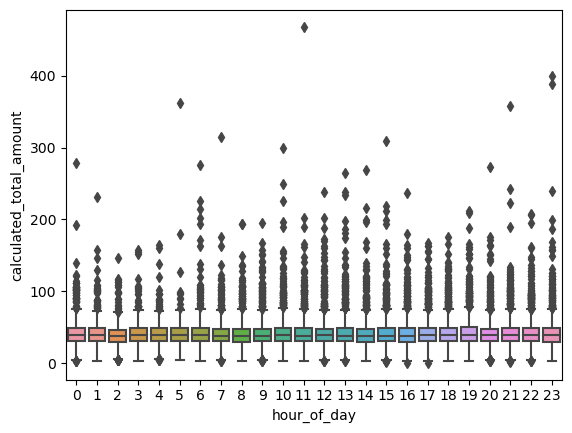

In [88]:
# Hour of the day

sns.boxplot(x = combined.hour_of_day,y = combined.calculated_total_amount)

# Busy Hours : 5,7,10,11,13,14,15,19,20,21,23

In [89]:
# Busy Hours:
busy = [0,5,7,10,11,13,14,15,19,20,21,23]
def imbusy(x):
    if x in busy:
        return('Peak_hour')
    else:
        return('Ease_Hour')

In [90]:
combined['magic6'] = combined.hour_of_day.apply(imbusy)

<Axes: xlabel='magic6', ylabel='calculated_total_amount'>

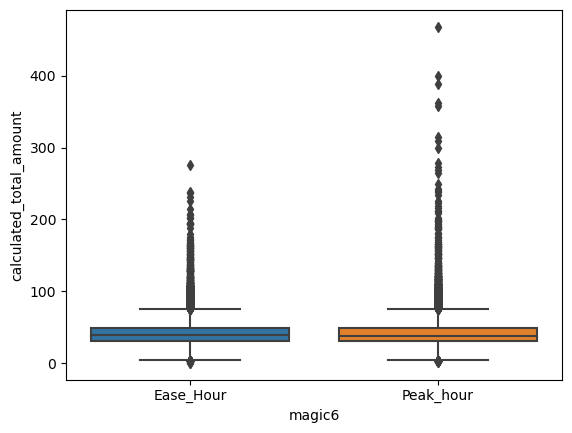

In [91]:
sns.boxplot(x = combined.magic6 ,y = combined.calculated_total_amount)

In [92]:
zones = pd.read_csv('taxi+_zone_lookup.csv')
zones

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN


In [93]:
pickeup_zones = combined.pickup_location_id.unique()

In [94]:
for i in zones.LocationID:
    if  i in pickeup_zones:
        print(zones.Zone)
    else:
        print('No Zone')

0               Newark Airport
1                  Jamaica Bay
2      Allerton/Pelham Gardens
3                Alphabet City
4                Arden Heights
                ...           
260         World Trade Center
261             Yorkville East
262             Yorkville West
263                         NV
264                        NaN
Name: Zone, Length: 265, dtype: object
No Zone
0               Newark Airport
1                  Jamaica Bay
2      Allerton/Pelham Gardens
3                Alphabet City
4                Arden Heights
                ...           
260         World Trade Center
261             Yorkville East
262             Yorkville West
263                         NV
264                        NaN
Name: Zone, Length: 265, dtype: object
0               Newark Airport
1                  Jamaica Bay
2      Allerton/Pelham Gardens
3                Alphabet City
4                Arden Heights
                ...           
260         World Trade Center
261            

<Axes: xlabel='day', ylabel='calculated_total_amount'>

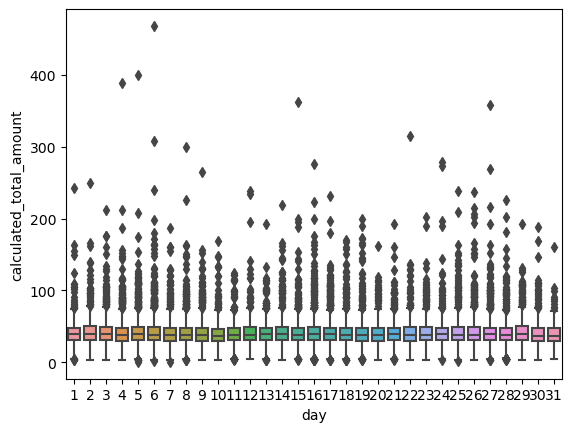

In [95]:
### Days

sns.boxplot(x = combined.day,y = combined.calculated_total_amount)


In [96]:
busy_days = [4,56,8,15,16,22,24,27]

def busy(x):
    if x in busy_days:
        return('Busy_Days')
    else:
        return('Lean_Days')

In [97]:
combined['magic7']  = combined.day.apply(busy)

<Axes: xlabel='magic7', ylabel='calculated_total_amount'>

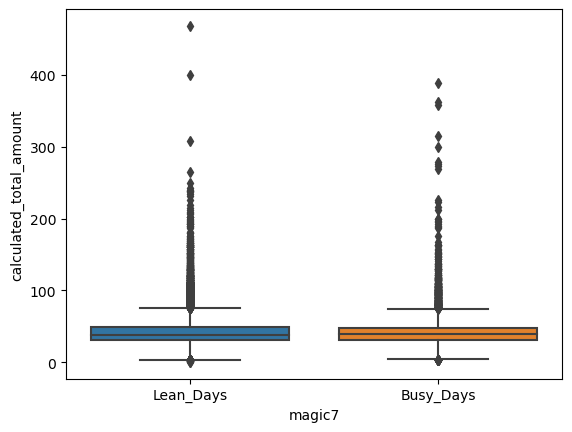

In [98]:
sns.boxplot(x = combined.magic7 ,  y =combined.calculated_total_amount)

In [99]:
# Day waise avg Fare
combined.groupby('day')['calculated_total_amount'].describe()
combined['magic8'] = combined.groupby('day')['calculated_total_amount'].transform('count')
combined['magic9'] = combined.groupby('day')['calculated_total_amount'].transform('mean')
combined['magic10'] = combined.groupby('day')['calculated_total_amount'].transform('median')
combined['magic11'] = combined.groupby('day')['calculated_total_amount'].transform('min')
combined['magic12'] = combined.groupby('day')['calculated_total_amount'].transform('max')

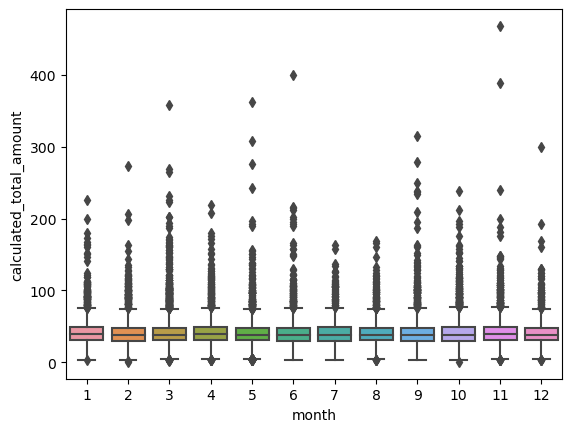

In [100]:
### Month

sns.boxplot(x = combined.month,y = combined.calculated_total_amount)

busy_month = [3,5,6,9,11]
busy_days = [4,56,8,15,16,22,24,27]

def busy(x):
    if x in busy_days:
        return('Busy_Months')
    else:
        return('Lean_Months')

In [101]:
# Day waise avg Fare
combined.groupby('month')['calculated_total_amount'].describe()
combined['magic13'] = combined.groupby('month')['calculated_total_amount'].transform('count')
combined['magic14'] = combined.groupby('month')['calculated_total_amount'].transform('mean')
combined['magic15'] = combined.groupby('month')['calculated_total_amount'].transform('median')
combined['magic16'] = combined.groupby('month')['calculated_total_amount'].transform('min')
combined['magic17'] = combined.groupby('month')['calculated_total_amount'].transform('max')

In [102]:
combined.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount,pick_&_drop,magic1,magic2,magic3,magic4,magic5,magic6,magic7,magic8,magic9,magic10,magic11,magic12,magic13,magic14,magic15,magic16,magic17
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,0.591944,24.30,262_138,63,39.290794,38.16,3.3,84.36,Ease_Hour,Lean_Days,1351,39.589319,37.270,0.31,186.30,5786,41.450427,38.460,0.90,358.56
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,0.660278,37.40,263_236,11,36.600000,31.56,4.3,62.47,Peak_hour,Lean_Days,1375,41.116327,38.460,1.30,238.44,2809,41.000997,38.160,0.31,273.30
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,0.357222,30.36,138_230,593,41.341265,39.39,3.3,144.00,Ease_Hour,Lean_Days,1100,41.828518,38.755,3.30,192.96,2292,41.816095,39.325,2.80,225.38
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,0.718333,4.30,186_138,104,40.143654,37.13,3.8,120.38,Peak_hour,Lean_Days,1375,41.116327,38.460,1.30,238.44,3062,41.214755,37.865,3.30,315.38
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,0.437500,23.80,162_87,31,41.366129,36.67,22.8,82.97,Peak_hour,Lean_Days,775,39.985174,37.560,3.30,161.47,2295,40.859124,37.880,3.30,168.30


In [103]:
# DROP THE unsignificant columns
#combined.drop(['pickup_location_id','dropoff_location_id','year','month','day','hour_of_day','pick_&_drop'],axis = 1, inplace=True)

In [104]:
# make column  speed 
combined['magic18'] = combined['trip_distance']/combined['trip_duration']

<Axes: xlabel='magic18', ylabel='calculated_total_amount'>

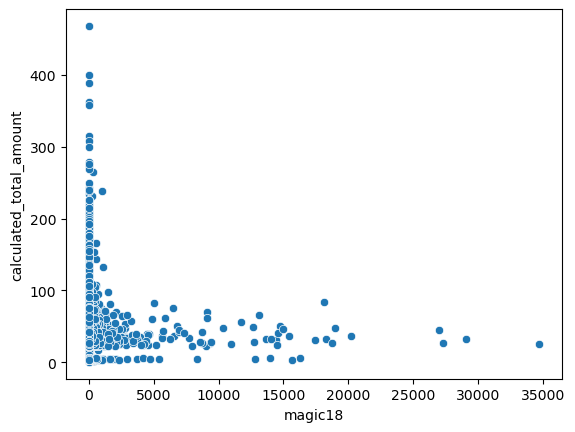

In [105]:
sns.scatterplot(x = combined.magic18, y = combined.calculated_total_amount)

In [106]:
combined.head(2)

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount,pick_&_drop,magic1,magic2,magic3,magic4,magic5,magic6,magic7,magic8,magic9,magic10,magic11,magic12,magic13,magic14,magic15,magic16,magic17,magic18
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,0.591944,24.3,262_138,63,39.290794,38.16,3.3,84.36,Ease_Hour,Lean_Days,1351,39.589319,37.27,0.31,186.30,5786,41.450427,38.46,0.90,358.56,15.221023
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,0.660278,37.4,263_236,11,36.600000,31.56,4.3,62.47,Peak_hour,Lean_Days,1375,41.116327,38.46,1.30,238.44,2809,41.000997,38.16,0.31,273.30,0.302903


In [107]:
# again check the missing values
combined.isnull().sum()

trip_distance                  0
rate_code                      0
store_and_fwd_flag             0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
imp_surcharge                  0
total_amount                   0
pickup_location_id             0
dropoff_location_id            0
year                           0
month                          0
day                            0
day_of_week                    0
hour_of_day                    0
trip_duration                  0
calculated_total_amount    15000
pick_&_drop                    0
magic1                         0
magic2                      1420
magic3                      1420
magic4                      1420
magic5                      1420
magic6                         0
magic7                         0
magic8                         0
magic9                         0
magic10   

In [108]:
# Target Encoding apply seperatly on train and test
# Otherwise it create noise 

In [109]:
# Split the data Back in train and test

newtrain = combined.iloc[0:train.shape[0]-1, ]
newtest = combined.iloc[train.shape[0]:, ]



In [110]:
newtrain.shape,newtest.shape,train.shape,test.shape

((34999, 39), (15000, 39), (35000, 20), (15000, 19))

In [111]:
newtest.drop('calculated_total_amount',axis = 1 , inplace = True)

In [112]:
newtrain.shape , newtest.shape

((34999, 39), (15000, 38))

In [113]:
#newtrain.groupby('pick_&_drop')['calculated_total_amount'].describe

In [114]:
# Apply Mgic 1  to 5


newtrain['magic1'] = newtrain.groupby('pick_&_drop')['calculated_total_amount'].transform('count')
newtrain['magic2'] = newtrain.groupby('pick_&_drop')['calculated_total_amount'].transform('mean')
newtrain['magic3'] = newtrain.groupby('pick_&_drop')['calculated_total_amount'].transform('median')
newtrain['magic4'] = newtrain.groupby('pick_&_drop')['calculated_total_amount'].transform('min')
newtrain['magic5'] = newtrain.groupby('pick_&_drop')['calculated_total_amount'].transform('max')

In [115]:
newtrain.groupby('day')['calculated_total_amount'].describe()
newtrain['magic8'] = newtrain.groupby('day')['calculated_total_amount'].transform('count')
newtrain['magic9'] = newtrain.groupby('day')['calculated_total_amount'].transform('mean')
newtrain['magic10'] = newtrain.groupby('day')['calculated_total_amount'].transform('median')
newtrain['magic11'] = newtrain.groupby('day')['calculated_total_amount'].transform('min')
newtrain['magic12'] = newtrain.groupby('day')['calculated_total_amount'].transform('max')

In [116]:
mapped = newtrain.groupby('pick_&_drop')['calculated_total_amount'].apply(lambda x :np.round(x.count(),2)).to_dict()

In [117]:
newtest['magic1'] = newtest['pick_&_drop'].map(mapped)

In [118]:
newtest.isnull().sum()[newtest.isnull().sum()!=0]        # there are null values 

magic1    1420
magic2    1420
magic3    1420
magic4    1420
magic5    1420
dtype: int64

In [119]:
newtrain.columns

Index(['trip_distance', 'rate_code', 'store_and_fwd_flag', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'imp_surcharge', 'total_amount', 'pickup_location_id',
       'dropoff_location_id', 'year', 'month', 'day', 'day_of_week',
       'hour_of_day', 'trip_duration', 'calculated_total_amount',
       'pick_&_drop', 'magic1', 'magic2', 'magic3', 'magic4', 'magic5',
       'magic6', 'magic7', 'magic8', 'magic9', 'magic10', 'magic11', 'magic12',
       'magic13', 'magic14', 'magic15', 'magic16', 'magic17', 'magic18'],
      dtype='object')

In [120]:
## Drop the columns :
#newtrain.drop(['pickup_location_id','dropoff_location_id','year','month','day','day_of_week','hour_of_day','magic1','magic2',
 #             'magic3','magic4','magic5','pick_&_drop'],axis= 1, inplace = True)

newtest.drop(['pickup_location_id','dropoff_location_id','year','month','day','day_of_week','hour_of_day','magic1',
              'pick_&_drop'],axis= 1, inplace = True)

In [121]:
newtrain.shape,newtest.shape

((34999, 39), (15000, 29))

### Statistical Testing 

In [132]:
num_cols = ['trip_distance','fare_amount','extra','mta_tax','tip_amount','tolls_amount','imp_surcharge',
           'total_amount','trip_duration','magic8','magic9','magic10','magic11',
           'magic12','magic13','magic14','magic15','magic16', 'magic17', 'magic18']

In [133]:
import scipy.stats as stats

imp_feats = []
for i in num_cols:
    teststats,pvalue = stats.ttest_ind(newtrain.loc[:,i],
                                      newtrain.calculated_total_amount)
    if pvalue < 0.05:
        imp_feats.append(i)

In [124]:
# rate_code and payment Type

import statsmodels.formula.api as sfa
from statsmodels.stats.anova import anova_lm

model = sfa.ols('calculated_total_amount ~ rate_code',data = newtrain).fit()

print(anova_lm(model))

                df        sum_sq      mean_sq         F    PR(>F)
rate_code      1.0  1.763047e+03  1763.047105  4.799588  0.028473
Residual   34997.0  1.285555e+07   367.332972       NaN       NaN


In [125]:
model = sfa.ols('calculated_total_amount ~ payment_type',data = newtrain).fit()

print(anova_lm(model))

                   df        sum_sq       mean_sq          F        PR(>F)
payment_type      1.0  2.105439e+04  21054.394205  57.403059  3.637975e-14
Residual      34997.0  1.283626e+07    366.781743        NaN           NaN


In [126]:
dummytrain = pd.get_dummies(newtrain, drop_first=True)
dummytest = pd.get_dummies(newtest, drop_first=True)

In [127]:
dummytrain.shape,dummytest.shape

((34999, 6577), (15000, 29))

In [128]:
print(imp_feats)

['trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount']


In [129]:
# Magic 14, total_amount, magic 9
#dummytrain.drop(['total_amount','magic14','magic9'],axis = 1, inplace= True)
#dummytest.drop(['total_amount','magic14','magic9'],axis = 1, inplace= True)

## Model Building

In [130]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
kfold = KFold(n_splits=5 , shuffle=True,random_state=42)
X = dummytrain.drop('calculated_total_amount',axis = 1)
y = dummytrain.calculated_total_amount

In [ ]:
lr = LinearRegression()
gbm = GradientBoostingRegressor()

pred = []
for train_index , test_index in kfold.split(X,y):
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred.append(lr.fit(xtrain,ytrain).predict(dummytest))

In [ ]:
# Linear Regression
final = pd.DataFrame(pred).T.mean(axis = 1)

In [ ]:
# Gradient 
lr = LinearRegression()
gbm = GradientBoostingRegressor()

pred = []
for train_index , test_index in kfold.split(X,y):
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred.append(gbm.fit(xtrain,ytrain).predict(dummytest))

In [ ]:
# GBM
final_gbm = pd.DataFrame(pred).T.mean(axis = 1)

In [ ]:
submission['calculated_total_amount'] = final

In [ ]:
submission.to_csv('LRMODEL_Taxi.csv',index = False)

In [209]:
cd

C:\Users\MADHU
